### Ejemplo de experimentación verificando la complejidad temporal

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
df = pd.read_csv("runtime_random.csv")

<Figure size 640x480 with 0 Axes>

In [38]:
df.columns

Index(['n', 'n^2', 'mlogn', 'mn^2'], dtype='object')

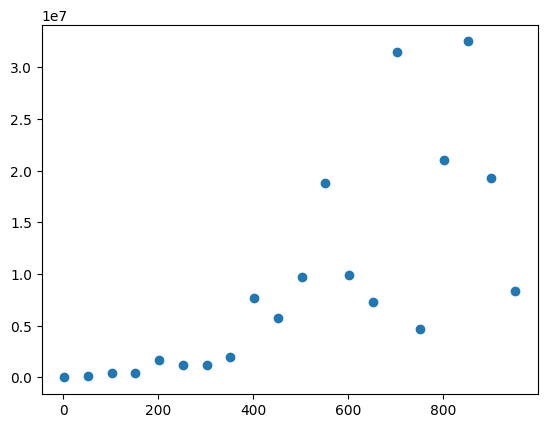

In [39]:
plt.scatter(df["n"], df["n^2"])
# plt.scatter(df["n"], 30*df["n"]**2)

<AxesSubplot: xlabel='n'>

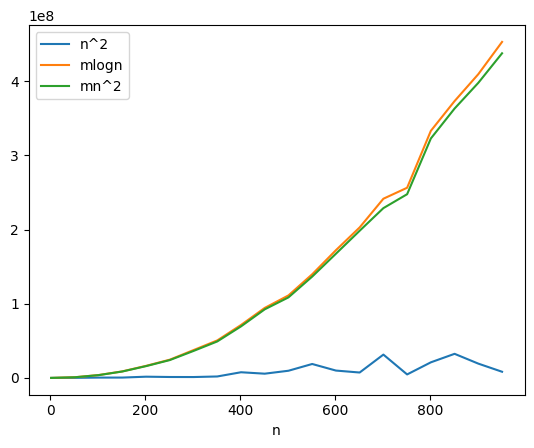

In [40]:
df.plot(x="n")